<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matias Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Nicolás Cabello
- Nombre de alumno 2: Esteban Muñoz


### **Link de repositorio de GitHub:** `https://github.com/NicoCabello/Laboratorio_Progra_Cientifica`


## Reglas:

- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 214 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
def mount_drive(path):
    try:
        from google.colab import drive

        drive.mount("/content/drive")
        %cd {path}
    except: 
        print('Ignorando conexión drive-colab')

In [3]:
mount_drive("/content/drive/My Drive/MDS7202/Laboratorio 5/")

Mounted at /content/drive
/content/drive/My Drive/MDS7202/Laboratorio 5


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [4]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom

In [5]:
df_retail.loc[df_retail["StockCode"] == 85048]

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
400     C489518     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   
626     C489528     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   
1134    C489551     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   
1256     489559     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
...         ...       ...                                  ...       ...   
523546   538068     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS         2   
524636  C538109     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   
524668   538116     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS         2   
524884   538148     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS         1   
524995   538149     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS         1   

               InvoiceDate  Price Customer ID         Country  
0      2009-12-01 07:45:00   6.95     13085.0  United Kingdom  
400    2009-12-01 11:35:00   7.95     15461.0  United Kingdom  
626    2009-12-01 11:50:00   7.95     16714.0  United Kingdom  
1134   2009-12-01 12:35:00   6.95     17641.0  United Kingdom  
1256   2009-12-01 12:55:00   6.95     17056.0  United Kingdom  
...                    ...    ...         ...             ...  
523546 2010-12-09 14:05:00   7.95     17978.0  United Kingdom  
524636 2010-12-09 15:23:00   7.95     16042.0  United Kingdom  
524668 2010-12-09 15:32:00   7.95     13327.0  United Kingdom  
524884 2010-12-09 16:26:00  16.98         NaN  United Kingdom  
524995 2010-12-09 16:27:00  16.98         NaN  United Kingdom  

[319 rows x 8 columns]

In [6]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


In [261]:
print('La cantidad de elementos nulos por cada variables es:')
print(df_retail.isnull().sum())

La cantidad de elementos nulos por cada variables es:
Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
Revenue             0
dtype: int64


In [262]:
# Descripicion de variables numericas
df_retail.describe()

Quantity          Price        Revenue
count  525461.000000  525461.000000  525461.000000
mean       10.337667       4.688834      18.154506
std       107.424110     146.126914     160.333083
min     -9600.000000  -53594.360000  -53594.360000
25%         1.000000       1.250000       3.750000
50%         3.000000       2.100000       9.950000
75%        10.000000       4.210000      17.700000
max     19152.000000   25111.090000   25111.090000

El dataset presenta 8 columnas. De acuerdo a una visualización básica de los datos, se ha inferido que la información entregada se encuentra desagregada por el código de la compra y por el código de cada producto dentro de esta compra. El significado de cada columna corresponde a:

- **Invoice**: Código que representa la factura de un cliente. Un cliente puede adquirir más de un tipo de producto por compra, por lo que este código se puede repetir en varios registros. Es de tipo categórica nominal.
- **StockCode**: Código de uno de los productos dentro de la compra. Variable categórica nominal.
- **Description**: Descripción del producto asociado al código *StockCode*. Variable de tipo string.
- **Quantity**: Cantidad de existencias del producto adquiridas por el cliente. Variable de tipo int.
- **InvoiceDate**: Fecha y hora en la que se pasaron los productos con código *StockCode* por la caja registradora. Variable de tipo DateTime.
- **Price**: Precio del producto con el código *StockCode*. Variable de tipo float.
- **Customer ID**: Identificador del cliente que adquiere el producto. Variable de tipo categórica nominal.
- **Country**: País en donde ocurrió la compra. Variable de tipo string.

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> El análisis univariable corresponde al estudio de variables del dataset de manera individual a través de estadísticas de resumen, histogramas, gráficos, entre otros; pero siempre con un enfoque individual de las variables. El análisis multivariado corresponde al estudio del compotamiento de las variables con respecto a otras dentro de un dataset. El análisis de datos faltantes indica patrones o tendencias asociado a la falta de datos. El estudio de estos datos permite tener una mayor comprensión inicial de los datos a analizar.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [7]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [8]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

La media de los precios de los productos vendidos es de 4.69 unidades monetarias, aunque con una desviación estándar de 146.13. De acuerdo a la distribución de los precios sampleados mostrados en el histograma, es inusual que existan valores monetarios tan altos, por lo que dicha desviación puede deberse a los outliers del dataset.

De acuerdo a los cuartiles, más del 75% de los precios se encuentran por debajo de la media, por lo que posiblemente el promedio también se encuentre sesgado por los outliers. Del mismo modo, un skewness negativo y alta kurtosis señalan que los outliers tienen un gran peso en las medidas de la variable.
    
En cuanto a valores perdidos, a esta variable no le faltan valores en ninguna fila. Sin embargo, existen 3 valores negativos y 3687 valores iguales a 0, los que no se condicen con el rango esperado para una variable de unidades monetarias.

Al eliminar los outliers de los datos sampleados se percibe de mejor manera la distribución en el nuevo histograma, y la mediana se sigue manteniendo en 2.1 de modo que la mitad inferior de los datos se agrupa en un rango más pequeño que la otra mitad. Aún así, se debe tomar en cuenta que normalizar y eliminar outliers no corrige los valores menores o iguales a 0.

In [9]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

La variable invoice cuenta con 28816 valores distintos, indicando la cantidad de veces que se emitió una factura. El valor más repetido corresponde a 537434, con 675 filas. Esto quiere decir que el cliente con la factura 537434 ha adquirido 675 productos distintos.

No existen valores perdidos en esta variable y casi el 98.5% son valores repetidos, por lo que la mayoría de los clientes llevó varios productos en sus compras.

De acuerdo al gráfico de barras, más de 50 compras contienen 400 o más productos, y en al menos 100 compras los clientes se llevaron 200 o más tipos de productos distintos.

In [10]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

La variable StockCode cuenta con 4632 valores distintos, por lo que de acuerdo a estos registros, los clientes han comprado 4632 productos distintos. El código de producto más repetido es el 85123A, adquirido en 3516 compras distintas. Más del 99.9% de las filas del dataset tienen algún StockCode repetido, y no existen valores perdidos en esta variable.

El gráfico de barras muestra una diferencia significativa entre la adquisición del producto que más veces aparece en las ventas y el producto que le sigue, con casi 1300 apariciones menos de este último producto. Los 40 primeros productos fueron vendidos en más de 1000 transacciones distintas, mientras que los 100 primeros fueron vendidos en 689 o más transacciones distintas.

In [11]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

Existen 4682 descripciones de productos distintas en el dataset, siendo la descripción con más apariciones "WHITE HANGING HEART T-LIGHT HOLDER" con 3549 apariciones.

Aún cuando no hay datos vacíos en esta variable, el gráfico de barras muestra que la segunda descripción que más veces aparece es "nan", con 2928 registros. Dado lo anterior, se sabe que en realidad si existen datos perdidos en esta columna.

La tercera descripción con más apariciones se encuentra en 2212 filas. A partir de la cuarta descripción se baja a menos de 2000 apariciones, y las 100 descripciones más comunes aparecen en 644 o más registros del dataset.

In [12]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

La cantidad de unidades promedio que se adquiere es de 10.34, con una desviación estándar de 107.42. El mínimo se encuentra en -9600, mientras que el primer cuartil y la mediana están en 1 y 3 unidades respectivamente. El tercer cuartil es de 10 unidades, mientras que el máximo está en 19152. En esta variable se puede notar que el mínimo es un valor imposible, pues no pueden haber cantidades negativas de productos adquiridos, por lo que existen 12326 filas que deben ser corregidas o eliminadas; mientras que el máximo es improbable si se toma en cuenta la mediana, el tercer cuartil y el promedio de unidades por venta.

El skewness indica que esta variable está ligeramente concentrada hacia la izquierda, con la cola derecha de la distribución más larga. En cuanto a la kurtosis, se puede inferir que el peso de esta cola es significativo. Este dato junto a la comparación del promedio con la mediana y el tercer cuartil, entrega información sobre un sesgo de la variable producto de valores positivos muy altos.

El histograma de datos sampleados muestra gráficamente los datos estadísticos proporcionados: una gran cantidad de muestras se concentran en el rango 0 a 4; existen algunos datos con valores negativos y valores positivos que se escapan varias desviaciones estándar. Al eliminar los outliers de ests sampleo de datos, se puede visualizar de mejor manera la distribución aproximada de la variable Quantity.

In [13]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

La fecha de la primera transacción ocurre en el 28/06/2009, mientras que la última transacción del dataset ocurre en 09/12/2010. La mediana de estas fechas se encuentra en 06/07/2010, lo que junto al histograma permite observar que la cantidad de ventas se realizó de manera homogénea a lo largo del tiempo. El periodo con menor cantidad de ventas de acuerdo a los datos sampleados ocurre entre 20/12/2009 y 02/01/2010, mientras que el periodo con mayor número de transacciones ocurre entre 07/11/201 y 20/11/2010.

In [14]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

4383 clientes distintos han comprado según el dataset, siendo el cliente con ID 14911 el que más veces ha comprado, específicamente con 5710 compras. En cuanto a valores perdidos, esta columna cuenta con 107927 de ellos, un 20.54% del total.

Los 2 clientes con mayor cantidad de compras exceden las 5000 compras, mientras que el tercero ha realizado casi 4000 compras. Más de 20 clientes ha realizado 1000 compras o más, mientras que los 100 clientes más frecuentes han hecho 485 o más compras.

In [15]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

Un total de 40 países conforman los datos de la variable Country. El valor que más se repite es United Kingdom, con 485852 filas. Los siguientes 8 países cuentan con más de 1000 y menos de 10000 registros, mientras que el resto tiene una cantidad de filas en el dataset varios órdenes de magnitud inferior respecto a United Kingdom. No existen valores perdidos en esta variable.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [16]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

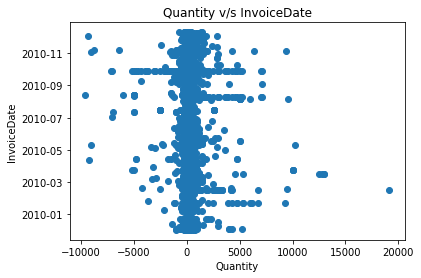

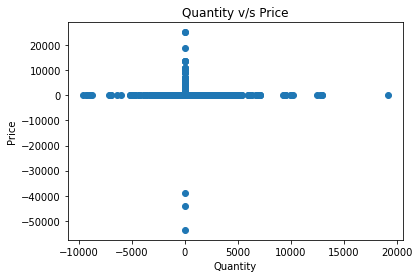

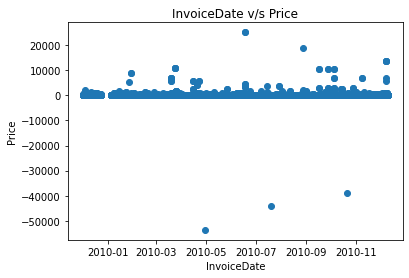

## Correlation:

## Missing Matrix:

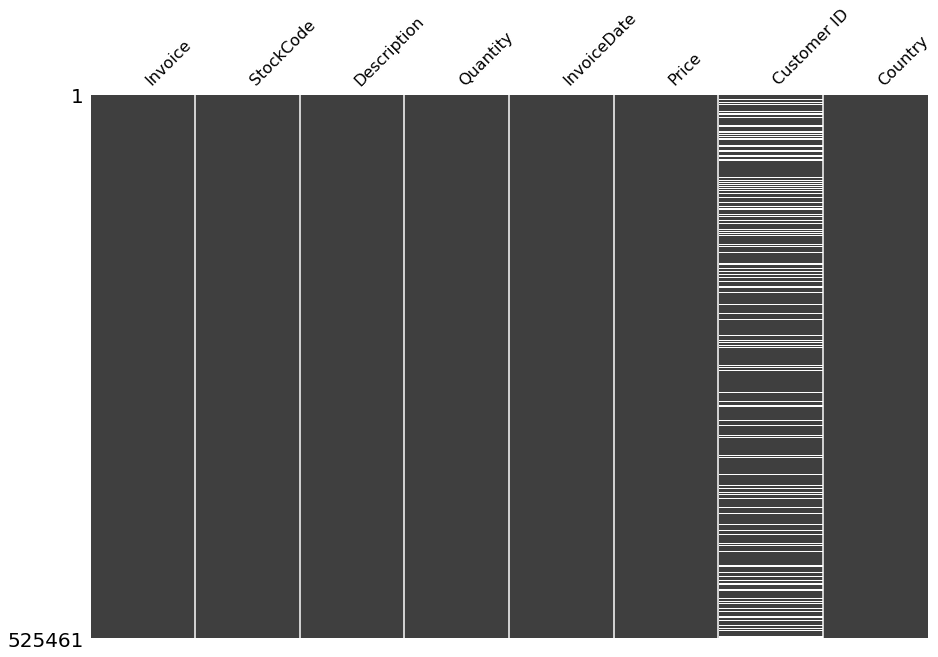

In [17]:
profile_df(df_retail)

El análisis multivariado no muestra grandes hallazgos. No hay una correlación entre el precio de los productos y la cantidad adquirida por los clientes. Además, no se ve una tendencia a adquirir más productos o artículos más caros en fechas específicas. En cuánto a los datos faltantes, se puede apreciar que la variable más crítica corresponde a Customer ID.

De los análisis anteriores, se puede concluir que existe un desajuste entre el código de un producto y su respectiva descripción, pues existen más descripciones que códigos. Sin un análisis acabado de los datos, no se puede concluir a ciencia cierta a qué se debe este desajuste, por lo que a priori se asumirá que el desajuste se debe a una incorrecta imputación de la descripción. Por lo mismo, se corregirá la variable *Description* de modo que cada *StockCode* posea sólo la descripción que más veces aparece para ese código.

A la variable *Customer ID* se le removerán todos los valores perdidos. El objetivo final de este análisis es realizar una segmentación de los clientes, por lo que si no se cuenta con información sobre qué cliente adquirió un producto, dicha fila no entrega información relevante para la tarea en cuestión.

Para saber qué hacer con las variables *Quantity* y *Price* se debe analizar a qué se deben los valores más altos de estas variables. Es posible que no eliminen los outliers de estas variables, pues es factible que algún cliente haya decidido adquirir una cantidad elevada de un producto de bajo costo, o pocos productos con alto valor. Nuevamente, sin información previa del dataset no es posible determinar si estos valores inusuales son errores o información correcta de las ventas. Se sabe que presentan valores negativos y/o iguales a cero, lo que no tiene sentido para este tipo de variables. Se procederá a eliminar todos los registros con valores menores o iguales a 0.

Para un mejor análisis se creará una variable *Revenue*, que representará la cantidad de dinero gastado en cada tipo de producto. Finalmente, además de analizar si un precio o cantidad de productos se deben eliminar, se analizará si se deben borrar o no los outliers de esta última variable creada.

In [125]:
df_retail.loc[df_retail["Quantity"] == df_retail["Quantity"].max()]

Invoice StockCode                         Description  Quantity  \
90857  497946     37410  BLACK AND WHITE PAISLEY FLOWER MUG     19152   

              InvoiceDate  Price Customer ID  Country  
90857 2010-02-15 11:57:00    0.1     13902.0  Denmark

In [128]:
df_retail.loc[(stats.zscore(df_retail.Quantity) >= 3)]

Invoice StockCode                          Description  Quantity  \
217     489460     84598        BOYS ALPHABET IRON ON PATCHES       576   
575     489523     84879        ASSORTED COLOUR BIRD ORNAMENT       800   
3572    489727     22086      PAPER CHAIN KIT 50'S CHRISTMAS        450   
4793    489831     84347  ROTATING SILVER ANGELS T-LIGHT HLDR       480   
6443    489889    85123A   WHITE HANGING HEART T-LIGHT HOLDER       480   
...        ...       ...                                  ...       ...   
522087  537841     16014          SMALL CHINESE STYLE SCISSOR      1000   
522809  537899     22328   ROUND SNACK BOXES SET OF 4 FRUITS       1488   
522918  537981     22492              MINI PAINT SET VINTAGE       1394   
522919  537981     22536           MAGIC DRAWING SLATE PURDEY       400   
523543  538068     22154          ANGEL DECORATION 3 BUTTONS        432   

               InvoiceDate  Price Customer ID         Country  
217    2009-12-01 10:46:00   0.21     16167.0  United Kingdom  
575    2009-12-01 11:46:00   1.45     12931.0  United Kingdom  
3572   2009-12-02 11:09:00   2.00     17949.0  United Kingdom  
4793   2009-12-02 13:58:00   2.10     12435.0         Denmark  
6443   2009-12-02 16:52:00   2.55     14646.0     Netherlands  
...                    ...    ...         ...             ...  
522087 2010-12-08 15:10:00   0.32     13848.0  United Kingdom  
522809 2010-12-09 10:44:00   2.55     12755.0           Japan  
522918 2010-12-09 11:35:00   0.55     17857.0  United Kingdom  
522919 2010-12-09 11:35:00   0.36     17857.0  United Kingdom  
523543 2010-12-09 14:05:00   0.36     17978.0  United Kingdom  

[1093 rows x 8 columns]

A primera vista, las filas con mayor *Quantity* también tienen un bajo valor en *Price*, por lo que es factible que estas ventas sean datos fidedignos. No se eliminarán registros con alto valor en *Quantity*.

In [265]:
px.histogram(
    df_retail.loc[df_retail["Price"] > 0], 
    x="Price", 
    title="Análisis de la variable Price", 
    marginal="box"
)

In [168]:
df_retail.loc[df_retail["Price"] == df_retail["Price"].max()]

Invoice StockCode Description  Quantity         InvoiceDate     Price  \
241824  C512770         M      Manual        -1 2010-06-17 16:52:00  25111.09   
241827   512771         M      Manual         1 2010-06-17 16:53:00  25111.09   

       Customer ID         Country   Revenue  
241824     17399.0  United Kingdom -25111.09  
241827         NaN  United Kingdom  25111.09

In [129]:
df_retail.loc[(stats.zscore(df_retail.Price) >= 3)]

Invoice StockCode     Description  Quantity         InvoiceDate  \
2379     489597       DOT  DOTCOM POSTAGE         1 2009-12-01 14:28:00   
5063     489856       DOT  DOTCOM POSTAGE         1 2009-12-02 14:36:00   
5407     489857       DOT  DOTCOM POSTAGE         1 2009-12-02 14:43:00   
8374     490074       DOT  DOTCOM POSTAGE         1 2009-12-03 14:39:00   
9307    C490129         M          Manual        -1 2009-12-03 18:26:00   
...         ...       ...             ...       ...                 ...   
521479   537823       DOT  DOTCOM POSTAGE         1 2010-12-08 14:25:00   
524272   538071       DOT  DOTCOM POSTAGE         1 2010-12-09 14:09:00   
524887   538148       DOT  DOTCOM POSTAGE         1 2010-12-09 16:26:00   
525000   538149       DOT  DOTCOM POSTAGE         1 2010-12-09 16:27:00   
525126   538153       DOT  DOTCOM POSTAGE         1 2010-12-09 16:31:00   

          Price Customer ID         Country  
2379     647.19         NaN  United Kingdom  
5063     470.24         NaN  United Kingdom  
5407     775.24         NaN  United Kingdom  
8374     862.67         NaN  United Kingdom  
9307    1998.49     15482.0  United Kingdom  
...         ...         ...             ...  
521479   729.42         NaN  United Kingdom  
524272   885.94         NaN  United Kingdom  
524887   547.32         NaN  United Kingdom  
525000   620.68         NaN  United Kingdom  
525126   822.94         NaN  United Kingdom  

[291 rows x 8 columns]

Los datos visibles de filas con alto valor de *Price* corresponden principalmente a costos de envío. Aquello no entrega mucha información sobre la correcta imputación de estos datos o sin son valiosos, por lo que se visualizarán los precios sin algunos *StockCode*.

In [247]:
high_price = df_retail.loc[(stats.zscore(df_retail.Price) >= 3)]
high_price.loc[~high_price["StockCode"].isin(["DOT", "M"])]

Invoice     StockCode                          Description  Quantity  \
33435   C492206  BANK CHARGES                         Bank Charges        -1   
55948   C494438  BANK CHARGES                         Bank Charges        -1   
71069   C495789        ADJUST  Adjustment by john on 26/01/2010 17        -1   
71077    495798        ADJUST  Adjustment by john on 26/01/2010 17         1   
95554   C498420             D                             Discount        -1   
104220  C499374  BANK CHARGES                         Bank Charges        -1   
136253  C502438             S                              SAMPLES        -1   
136403   502451         84016           FLAG OF ST GEORGE CAR FLAG         1   
171333  C505679  BANK CHARGES                         Bank Charges        -1   
192196   507637         84016           FLAG OF ST GEORGE CAR FLAG         1   
204072  C509053  BANK CHARGES                         Bank Charges        -1   
219933  C510764  BANK CHARGES                         Bank Charges        -1   
219947  C510768  BANK CHARGES                         Bank Charges        -1   
273179  C515918  BANK CHARGES                         Bank Charges        -1   
318602  C520413             D                             Discount        -1   
320581  C520667  BANK CHARGES                         Bank Charges        -1   
353617  C523765          POST                              POSTAGE        -1   
399358  C527516             D                             Discount        -1   
440688  C531400     AMAZONFEE                           AMAZON FEE        -1   
440698   531411     AMAZONFEE                           AMAZON FEE         1   
450818  C532255             D                             Discount        -1   
464322   533162          POST                              POSTAGE         1   
517953  C537630     AMAZONFEE                           AMAZON FEE        -1   
517955   537632     AMAZONFEE                           AMAZON FEE         1   
519170  C537644     AMAZONFEE                           AMAZON FEE        -1   
519251  C537647     AMAZONFEE                           AMAZON FEE        -1   
519294  C537651     AMAZONFEE                           AMAZON FEE        -1   
519295  C537652     AMAZONFEE                           AMAZON FEE        -1   

               InvoiceDate     Price Customer ID         Country   Revenue  
33435  2009-12-15 16:32:00    848.43         NaN  United Kingdom   -848.43  
55948  2010-01-14 12:15:00    767.99         NaN  United Kingdom   -767.99  
71069  2010-01-26 17:17:00    503.19         NaN  United Kingdom   -503.19  
71077  2010-01-26 17:25:00   5117.03         NaN  United Kingdom   5117.03  
95554  2010-02-18 16:25:00    947.08     14646.0     Netherlands   -947.08  
104220 2010-02-26 11:55:00    467.54         NaN  United Kingdom   -467.54  
136253 2010-03-24 13:11:00    605.18         NaN  United Kingdom   -605.18  
136403 2010-03-24 14:14:00    867.79         NaN  United Kingdom    867.79  
171333 2010-04-23 15:47:00    605.53         NaN  United Kingdom   -605.53  
192196 2010-05-10 14:55:00   1157.15         NaN  United Kingdom   1157.15  
204072 2010-05-20 11:13:00    465.21         NaN  United Kingdom   -465.21  
219933 2010-06-03 13:12:00    589.59         NaN  United Kingdom   -589.59  
219947 2010-06-03 13:26:00    555.22         NaN  United Kingdom   -555.22  
273179 2010-07-15 13:33:00    453.82         NaN  United Kingdom   -453.82  
318602 2010-08-26 09:38:00    591.43     15498.0  United Kingdom   -591.43  
320581 2010-08-27 13:42:00  18910.69         NaN  United Kingdom -18910.69  
353617 2010-09-24 10:20:00    744.54     17032.0  United Kingdom   -744.54  
399358 2010-10-18 13:03:00    619.92     18102.0  United Kingdom   -619.92  
440688 2010-11-08 10:08:00   6706.71         NaN  United Kingdom  -6706.71  
440698 2010-11-08 10:11:00   6706.71         NaN  United Kingdom   6706.71  
450818 2010-11-11 12:50:00   1269.51     14088.0  United Kingdom  -126

Parece ser que las filas del dataset con alto valor en *Price* no entregan información relevante sobre las compras de los clientes, por lo que estas filas se eliminarán.

In [158]:
df_retail["Revenue"] = df_retail["Quantity"] * df_retail["Price"]

In [169]:
df_retail.loc[df_retail["Revenue"] == df_retail["Revenue"].max()]

Invoice StockCode Description  Quantity         InvoiceDate     Price  \
241827  512771         M      Manual         1 2010-06-17 16:53:00  25111.09   

       Customer ID         Country   Revenue  
241827         NaN  United Kingdom  25111.09

In [161]:
high_revenue = df_retail.loc[(stats.zscore(df_retail.Revenue) >= 3)]
high_revenue.loc[high_revenue["StockCode"] != "DOT"]

Invoice StockCode                         Description  Quantity  \
575     489523     84879       ASSORTED COLOUR BIRD ORNAMENT       800   
3290    489675   15056BL             EDWARDIAN PARASOL BLACK       240   
3296    489675     20679               EDWARDIAN PARASOL RED       120   
3306    489675     22041        RECORD FRAME 7" SINGLE SIZE        240   
3511    489702     22086     PAPER CHAIN KIT 50'S CHRISTMAS        280   
...        ...       ...                                 ...       ...   
522042  537833     51008            AFGHAN SLIPPER SOCK PAIR       200   
522809  537899     22328  ROUND SNACK BOXES SET OF 4 FRUITS       1488   
522918  537981     22492             MINI PAINT SET VINTAGE       1394   
522978  538005     22622      BOX OF VINTAGE ALPHABET BLOCKS        72   
523466  538063     22830           UTILTY CABINET WITH HOOKS        96   

               InvoiceDate  Price Customer ID         Country  Revenue  
575    2009-12-01 11:46:00   1.45     12931.0  United Kingdom  1160.00  
3290   2009-12-02 09:47:00   4.60     13777.0  United Kingdom  1104.00  
3296   2009-12-02 09:47:00   4.60     13777.0  United Kingdom   552.00  
3306   2009-12-02 09:47:00   2.10     13777.0  United Kingdom   504.00  
3511   2009-12-02 10:52:00   2.55     17511.0  United Kingdom   714.00  
...                    ...    ...         ...             ...      ...  
522042 2010-12-08 14:53:00   2.95     13270.0  United Kingdom   590.00  
522809 2010-12-09 10:44:00   2.55     12755.0           Japan  3794.40  
522918 2010-12-09 11:35:00   0.55     17857.0  United Kingdom   766.70  
522978 2010-12-09 12:12:00   8.50     13090.0  United Kingdom   612.00  
523466 2010-12-09 13:44:00  19.94     18102.0  United Kingdom  1914.24  

[1143 rows x 9 columns]

Las compras de productos que produjeron las mayores ganancias parecen ser legítimamente de productos de alto valor y/o que se vendieron en gran cantidad, por lo que estas filas no se eliminarán.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [172]:
def clean_df(dataframe_in):

    # Se realiza una copia del dataframe para no modificar el original
    df_copy = dataframe_in.copy()

    # Se eliminan todas las filas en donde Customer ID es desconocido
    df_copy = df_copy.loc[~df_copy["Customer ID"].isnull()]

    # Se eliminan todos los outliers de la variable Price
    idxs = df_copy.loc[(stats.zscore(df_copy.Price) >= 3)].index
    df_copy.drop(idxs, inplace=True)

    # Se eliminan todas las filas con valores imposibles de Quantity y Price
    idxs = df_copy.loc[(df_copy["Quantity"] <= 0) | (df_copy["Price"] <= 0)].index
    df_copy.drop(idxs, inplace=True)

    # Se realiza una agrupación por código y descripción
    stock_aggr = df_copy.groupby(by=["StockCode", "Description"])

    # Se cuenta la cantidad de filas por cada par de (StockCode, Description)
    count_descriptions = stock_aggr.agg("size")

    # Se obtiene la descripción más frecuente para cada StockCode
    right_descriptions = count_descriptions.groupby(level=0).idxmax()

    # Se realiza un mapeo entre StockCode y su descripción más frecuente
    description_map = dict(descr for descr in right_descriptions)

    # Se actualizan las descripciones en el DataFrame
    df_copy["Description"] = df_copy["StockCode"].map(description_map)

    return df_copy


In [173]:
new_df = clean_df(df_retail)

In [179]:
profile_serie(new_df['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           407559
Unique                            19136
Top                              500356
Freq                                270
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   405901
Duplicate rows (%)              99.59 %
Total size in memory      5362926 bytes
dtype: object

La cantidad máxima de productos por factura descendió de 675 a 270. Es posible que algunos de los clientes con información desconocida hayan adquirido una gran cantidad de artículos, por lo que al ser estos clientes eliminados del dataset se redujo la cantidad de productos adquiridos por clientes en el dataset. También se puede observar que no existe un cambio tan brusco entre las primeras facturas más repetidas y las que siguen.

In [182]:
profile_serie(new_df['StockCode']) 

## StockCode Profile

Type                           category
Number of observations           407559
Unique                             4015
Top                              85123A
Freq                               3153
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407400
Duplicate rows (%)              99.96 %
Total size in memory      4244782 bytes
dtype: object

Existen algunos cambios respecto a los productos más adquiridos por los clientes, pero en general se puede notar que esta variable no se vió tan afectada por la limpieza del dataset. El producto que más veces aparece en una factura sigue excediendo por más de 1000 ventas al artículo que sigue.

In [183]:
profile_serie(new_df['Description']) 

## Description Profile

Type                                                  object
Number of observations                                407559
Unique                                                  3991
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3153
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        407405
Duplicate rows (%)                                   99.96 %
Total size in memory                           6520944 bytes
dtype: object

Aún después de intentar mapear una única descripción a un único código de producto, la cantidad de valores únicos para cada variable sigue sin ser la misma. En esta ocasión, existen más artículos que descripciones, por lo que en lugar de obtener productos con más de una descripción, se tienen productos que comparten la misma descripción. Aún así, las descripciones con más apariciones coinciden con los cósigos con más apraciones en el dataset.

In [184]:
profile_serie(new_df['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         407559.0
Mean                           13.58882
Std                           96.853011
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                         9569.67102
Skew                          79.907829
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407445
Duplicate rows (%)              99.97 %
Total size in memory      6520944 bytes
dtype: object

A pesar de no eliminar filas cuyo valor de *Quantity* se considera un outlier, se puede notar que existe una menor dispersión de esta variable. La desviación estándar es inferior respecto al dataset original, pero el skewness y la kurtosis ahora son más altas. Posiblemente al eliminar los valores imposibles y no tratar los outliers directamente, el sesgo hacia valores muy altos creció aún más.

In [185]:
profile_serie(new_df['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           407559
Mean                      2010-07-01 10:17:22.321038336
Min                                 2009-12-01 07:45:00
25%                                 2010-03-26 14:01:00
50%                                 2010-07-09 15:31:00
75%                                 2010-10-14 17:09:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   406150
Duplicate rows (%)                              99.65 %
Total size in memory                      6520944 bytes
dtype: object

El comportamiento de esta variable sigue siendo parecido al que se obtuvo antes de la limpieza. Un detalle a tomar en cuenta es que se aacentuó la falta de transacciones en el periodo con menor cantidad de tipos de productos vendidos.

In [186]:
profile_serie(new_df['Price']) 

## Price Profile

Type                            float64
Number of observations         407559.0
Mean                           3.032397
Std                            3.899293
Min                               0.001
25%                                1.25
50%                                1.95
75%                                3.75
Max                               216.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          405.79732
Skew                          12.931736
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407430
Duplicate rows (%)              99.97 %
Total size in memory      6520944 bytes
dtype: object

La variable *Price* cambió bastante respecto a lo qeu se tenía previamente. Dado que se han eliminado los valores imposibles y los outliers, el promedio de los datos decreció a 3.03 y la desviación estándar es órdenes de magnitud más baja. El precio máximo ahora se encuentra en 216, lo que también indica una baja en los órdenes de magnitud del precio más alto.

In [187]:
profile_serie(new_df['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations         407559.0
Unique                           4301.0
Top                             14911.0
Freq                             5556.0
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407471
Duplicate rows (%)              99.98 %
Total size in memory      4242790 bytes
dtype: object

La mayor diferencia en esta variable es la nula existencia de valores perdidos. El resto de las métricas y los valores de la variable no sufrieron grandes cambios.

In [188]:
profile_serie(new_df['Country']) 

## Country Profile

Type                              object
Number of observations            407559
Unique                                37
Top                       United Kingdom
Freq                              370869
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    407559
Duplicate rows (%)               100.0 %
Total size in memory       6520944 bytes
dtype: object

No se observan cambios significativos en esta variable.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [236]:
def plot_mayor_ganancias(dataframe):
    most_profitable = dataframe.groupby(by=["Description"]).sum().sort_values(by=["Revenue"], ascending=False)[0:30]

    revenue_fig = px.bar(
        x=most_profitable.index,
        y=most_profitable["Revenue"],
        title="30 Most profitable Articles",
    )
    revenue_fig.show()

    most_sold = dataframe.groupby(by=["Description"]).sum().sort_values(["Quantity"], ascending=False)[0:30]

    quantity_fig = px.bar(
        x=most_sold.index,
        y=most_sold["Quantity"],
        title="30 Most sold Articles",
    )
    quantity_fig.show()

In [237]:
plot_mayor_ganancias(new_df)

Si bien es cierto algunos de los productos más vendidos son también algunos de los que generan más ganancias, este no siempre es el caso. Ejemplo de aquello es el artículo "REGENCY CAKESTAND 3 TIER", siendo el segundo artículo que más ganancias le reporta a la tienda no se encuentra entre los 30 artículos más vendidos. El caso contrario se encuentra en el artículo "WORLD WAR 2 GLIDERS ASSTD DESIGNS", que consiste en el tercer artículo más vendido, pero no se encuentra entre los 30 artículos que generan mayor ganancias.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [228]:
def plot_ventas(dataframe):
    by_date = dataframe.groupby([dataframe["InvoiceDate"].dt.date]).sum()

    fig = px.line(by_date, y="Revenue", title="Revenue by date")
    fig.show()

In [229]:
plot_ventas(new_df)

Del 23/12/2009 al 04/01/2010 no se encuentra ningún peak de ganancias, lo que coincide con el periodo de menor ventas según el análisis de la variable *InvoiceDate*. También se observa que hay algunos días con peaks inusualmente altos de ganancias, como por ejemplo el 07/01/2010 o 27/09/2010 (dia con mayor ganancias). A partir de 01/11/2010 esta variable comienza a tener una variación más grande en comparación a las fechas que le preceden, alternando entre valores altos y bajos de ganancias.

In [241]:
new_df.loc[(stats.zscore(new_df.Price) >= 3)]

Invoice StockCode                     Description  Quantity  \
89      489439      POST                         POSTAGE         3   
126     489444      POST                         POSTAGE         1   
173     489447      POST                         POSTAGE         1   
269     489465     20747              PICCADILLY TEA SET         4   
625     489526      POST                         POSTAGE         6   
...        ...       ...                             ...       ...   
524496  538094     22824  3 TIER SWEETHEART GARDEN SHELF         1   
524506  538095     22504     CABIN BAG VINTAGE RETROSPOT         1   
524735  538145     21781         MA CAMPAGNE CUTLERY BOX         1   
524776  538147         M                          Manual         1   
525396  538171     22824  3 TIER SWEETHEART GARDEN SHELF         1   

               InvoiceDate   Price Customer ID         Country  Revenue  
89     2009-12-01 09:28:00   18.00     12682.0          France    54.00  
126    2009-12-01 09:55:00  141.00     12636.0             USA   141.00  
173    2009-12-01 10:10:00  130.00     12362.0         Belgium   130.00  
269    2009-12-01 10:52:00   14.95     13767.0  United Kingdom    59.80  
625    2009-12-01 11:50:00   18.00     12533.0         Germany   108.00  
...                    ...     ...         ...             ...      ...  
524496 2010-12-09 14:50:00   35.95     13117.0  United Kingdom    35.95  
524506 2010-12-09 14:55:00   29.95     17097.0           Spain    29.95  
524735 2010-12-09 16:08:00   14.95     15211.0  United Kingdom    14.95  
524776 2010-12-09 16:11:00   15.00     13090.0  United Kingdom    15.00  
525396 2010-12-09 20:01:00   35.95     17530.0  United Kingdom    35.95  

[4363 rows x 9 columns]

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>